In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import trapz
patient_ID=['TCGA-A6-2682', 'TCGA-A6-5657', 'TCGA-A6-5660', 'TCGA-A6-5662',
       'TCGA-A6-5664', 'TCGA-A6-5667', 'TCGA-A6-6137', 'TCGA-A6-6140',
       'TCGA-A6-6141', 'TCGA-A6-6142', 'TCGA-A6-6648', 'TCGA-A6-6649',
       'TCGA-A6-6651', 'TCGA-A6-6654', 'TCGA-A6-6781', 'TCGA-AY-5543',
       'TCGA-AY-6386', 'TCGA-CK-4947', 'TCGA-CM-4747', 'TCGA-CM-4751',
       'TCGA-CM-5344', 'TCGA-CM-5860', 'TCGA-CM-5863', 'TCGA-CM-5868',
       'TCGA-CM-6162', 'TCGA-CM-6169', 'TCGA-CM-6172', 'TCGA-CM-6675',
       'TCGA-G4-6297', 'TCGA-G4-6303', 'TCGA-G4-6307', 'TCGA-G4-6311',
       'TCGA-G4-6314', 'TCGA-G4-6317', 'TCGA-G4-6320', 'TCGA-G4-6321',
       'TCGA-G4-6322']

last_follow=pd.read_csv('validation_data/data_with_FIRST_end_day.csv')
last_follow.set_index('Unnamed: 0',inplace=True)

a=[]
#check if patients last follow up day is bigger than end treatment day:
for patient in patient_ID:
    if last_follow.last_day_model.loc[patient]>last_follow.model_end_drug.loc[patient]:
        a.append(patient)
result_C=pd.DataFrame(columns=['Predicted_C'], index=a)
for p in a:
    data=pd.read_csv('validation_data/'+p+'dat.csv')
    end_day=last_follow.last_day_model.loc[p]
    result_C.loc[p]=[np.array(data.loc[data.time==end_day,'Cancer'])[0]]

print(result_C.shape)
result_C.head()

(31, 1)


,Predicted_C
TCGA-A6-2682,0.940249
TCGA-A6-5657,0.550147
TCGA-A6-5660,0.645662
TCGA-A6-5662,0.299556
TCGA-A6-5664,0.623782


In [6]:
result_C['tumor_status']=last_follow['tumor_status']
dic={'TUMOR FREE':0,'WITH TUMOR':1}
result_C['tumor_status']=result_C['tumor_status'].map(dic) 
result_C.head()

,Predicted_C,tumor_status
TCGA-A6-2682,0.940249,1
TCGA-A6-5657,0.550147,0
TCGA-A6-5660,0.645662,0
TCGA-A6-5662,0.299556,1
TCGA-A6-5664,0.623782,1


In [7]:

result_C['Predicted_C'].min()

3.409835425859007e-12

In [8]:
result_C['Predicted_C'].max()

0.9988251857484554

In [9]:

df = result_C[['tumor_status','Predicted_C']]
thresholds = list(np.array(list(range(1, 990, 1)))/1000)
roc_point = []
for threshold in thresholds:

    tp = 0; fp = 0; fn = 0; tn = 0

    for index, instance in df.iterrows():
        actual = instance["tumor_status"]
        prediction = instance["Predicted_C"]

        if prediction >= threshold:
            prediction_class = 1
        else:
            prediction_class = 0

        if prediction_class == 1 and actual == 1:
            tp = tp + 1
        elif actual == 1 and prediction_class == 0:
            fn = fn + 1
        elif actual == 0 and prediction_class == 1: 
            fp = fp + 1
        elif actual == 0 and prediction_class == 0:
            tn = tn + 1


    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)

    roc_point.append([tpr, fpr])
    
pivot = pd.DataFrame(roc_point, columns = ["x", "y"])
pivot["threshold"] = thresholds

Text(0, 0.5, 'True Positive Rate')

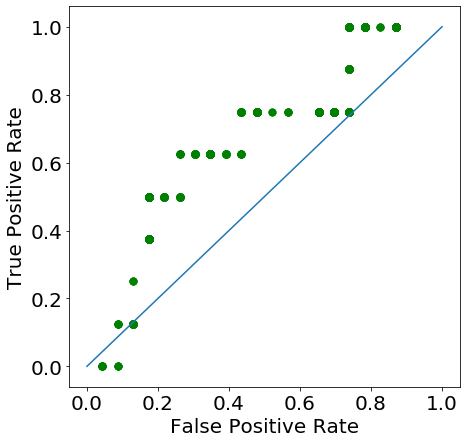

In [10]:
plt.figure(figsize=(7,7))
plt.scatter(pivot.y, pivot.x,s=50,c='green')
plt.plot([0, 1])
plt.yticks(  fontsize=20)
plt.xticks(  fontsize=20)
plt.xlabel('False Positive Rate',size=20)
plt.ylabel('True Positive Rate',size=20)
#plt.savefig("Plots/ROC_Cancer_FIRST_endday.eps",format='eps',bbox_inches='tight', dpi=1000)


In [11]:
from numpy import trapz
auc = round(abs(np.trapz(pivot.x, pivot.y)), 4)
auc

0.5299